In [ ]:
import os
os.environ['PROJ_LIB'] = '/home/userlibs/anaconda3/share/proj'

import re
import numpy as np
from glob import glob
from obspy import read
from obspy.signal.filter import bandpass,envelope
from obspy.geodetics.base import gps2dist_azimuth
from scipy import signal
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap


m = Basemap(projection='merc',llcrnrlat=25,urcrnrlat=40,llcrnrlon=122,urcrnrlon=140,lat_ts=2,resolution='h')
### create a spatial grid l ###
grid=[]
for i in np.arange(25,41,1):
    for j in np.arange(122,141,1):
        grid.append([i,j])
i_1,j_1=np.meshgrid(np.arange(122,141,1),np.arange(25,41,1))
i_2,j_2=m(i_1,j_1)

list = glob('/home/haoche/msnoise1/STACKS/02/090_DAYS/90days/2015-03-30/*.MSEED') # dir is your directory path
number_files = len(list)

envelope_sum=[]
for l in grid:
    # print(l)
    ### set the coordinates for the station pair i,j ###
    env_sum=[]
    floatenv = np.array(env_sum,dtype=np.float32)
    
    for tr in (glob('/home/haoche/msnoise1/STACKS/02/090_DAYS/90days/2015-03-30/*.MSEED')):
    #for tr in (glob('/home/haoche/msnoise_test/STACKS/01/REF/ZZ/*.MSEED')):
        #print(tr)
        sta_name = tr.split('/')[9].split('.')[0]
        sta1 = tr.split('/')[9].split('.')[0].split('_')[1]
        sta2 = tr.split('/')[9].split('.')[0].split('_')[3]
        sta_pair = sta1+'_'+sta2
    
        with open ('/home/haoche/msnoise1/STACKS_1Hz/01/REF_2year/ZZ/station_list.txt') as f1:
            for line1 in f1:
                if re.search(sta1,line1):
                    lat1 = float(line1.split(' ')[2])
                    lon1 = float(line1.split(' ')[3])
                if re.search(sta2,line1):
                    lat2 = float(line1.split(' ')[2])
                    lon2 = float(line1.split(' ')[3])
        #print(sta1,lat1,lon1,sta2,lat2,lon2)
        
        ### calculate and sum up the envelope ###
        
        st = read(tr)
        
        ### build a cosine filter ###
        distance0,_,_ = gps2dist_azimuth(lat1,lon1,lat2,lon2)
        window = signal.tukey(int(distance0/1000/3)*20*2+1,alpha=0.5)
        zeros = (24000-int(distance0/1000/3)*20*2)/2
        window1 = np.pad(window,(int(zeros),int(zeros)),'constant')
        window2 = abs(window1-1)

        freq = 1/15 #frequency in interest
        st[0].data = st[0].data
        st.filter('bandpass', freqmin=freq*2/3, freqmax=freq*4/3, corners=4)
        env = envelope(st[0].data)
        distance1,_,_ = gps2dist_azimuth(lat1,lon1,l[0],l[1])
        distance2,_,_ = gps2dist_azimuth(lat2,lon2,l[0],l[1])
        tn = distance1/1000/3-distance2/1000/3
        def round_nearest(x, a):
            return round(x / a) * a
        tn = format(round_nearest(tn,0.05),'.2f')
        index = int(-float(tn)*20+12000)
        floatenv = np.append(floatenv,env[index])
        #weighting = abs(np.sum(np.arctan(env[index]/st[0].data[index]))/number_files)
    envelope_sum.append(np.sum(floatenv))

    
###
plt.figure(figsize=(7,6))
plt.contourf(i_2, j_2,np.reshape(envelope_sum,np.shape(i_1)), cmap = 'jet',vmin=4*1e-6,vmax=3*1e-5)
m.drawcoastlines()
plt.colorbar(label='envelope CCF')
#plt.show()
plt.savefig('Backprojection_aso_15s_weighttest2.png')

[25, 122]
[25, 123]
[25, 124]
[25, 125]
[25, 126]
[25, 127]
[25, 128]
[25, 129]
[25, 130]
[25, 131]
[25, 132]
[25, 133]
[25, 134]
[25, 135]
[25, 136]
[25, 137]
[25, 138]
[25, 139]
[25, 140]
[26, 122]
[26, 123]
[26, 124]
[26, 125]
[26, 126]
[26, 127]
[26, 128]
[26, 129]
[26, 130]
[26, 131]
[26, 132]
[26, 133]
[26, 134]
[26, 135]
[26, 136]
[26, 137]
[26, 138]
[26, 139]
[26, 140]
[27, 122]
[27, 123]
[27, 124]
[27, 125]
[27, 126]
[27, 127]
[27, 128]
[27, 129]
[27, 130]
[27, 131]
[27, 132]
[27, 133]
[27, 134]
[27, 135]
[27, 136]
[27, 137]
[27, 138]
[27, 139]
[27, 140]
[28, 122]
[28, 123]
[28, 124]
[28, 125]
[28, 126]
[28, 127]
[28, 128]
[28, 129]
[28, 130]
[28, 131]
[28, 132]
[28, 133]
[28, 134]
[28, 135]
[28, 136]
[28, 137]
[28, 138]
[28, 139]
[28, 140]
[29, 122]
[29, 123]
[29, 124]
[29, 125]
[29, 126]
[29, 127]
[29, 128]
[29, 129]
[29, 130]
[29, 131]
[29, 132]
[29, 133]
[29, 134]
[29, 135]
[29, 136]
[29, 137]
[29, 138]
[29, 139]
[29, 140]
[30, 122]
[30, 123]
[30, 124]
[30, 125]
[30, 126]


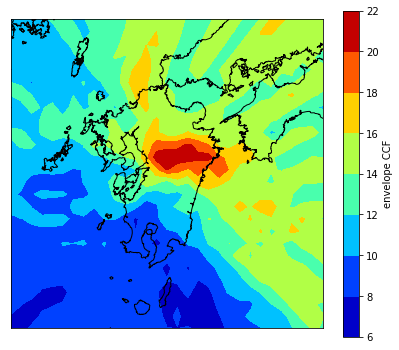

In [177]:
import os
os.environ['PROJ_LIB'] = '/home/userlibs/anaconda3/share/proj'
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

###
plt.figure(figsize=(7,6))
m = Basemap(projection='merc',llcrnrlat=30,urcrnrlat=35,llcrnrlon=128,urcrnrlon=134,lat_ts=2,resolution='h')
plt.contourf(i_2, j_2,np.reshape(envelope_sum,np.shape(i_1)), cmap = 'jet')
m.drawcoastlines()
#m.drawlsmask(ocean_color=None)
plt.colorbar(label='envelope CCF')
#plt.show()
plt.savefig('Backprojection_test.png')

In [198]:
for aa,bb in [[1,2,3],[6,7,8]]:
    print(aa,bb)

ValueError: too many values to unpack (expected 2)

In [207]:
a = [[[1,2,3],[2,3,4]],[[3,4,5],[4,5,6]]]
print(a)
for b in a:
    print(b[0])

[[[1, 2, 3], [2, 3, 4]], [[3, 4, 5], [4, 5, 6]]]
[1, 2, 3]
[3, 4, 5]


In [39]:
1e-5*3.4

3.4e-05